In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
carprice=pd.read_csv("data.csv")


In [2]:
type(carprice)

pandas.core.frame.DataFrame

In [3]:
carprice.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [4]:
carprice["Make"].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [5]:
df = carprice

In [6]:
carprice

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [9]:
le=preprocessing.LabelEncoder()
df.dropna(inplace=True)

In [10]:
df['Make']=le.fit_transform(df['Make'])
df['Engine Fuel Type']=le.fit_transform(df['Engine Fuel Type'])
df['Model']=le.fit_transform(df['Model'])
df['Transmission Type']=le.fit_transform(df['Transmission Type'])
df['Driven_Wheels']=le.fit_transform(df['Driven_Wheels'])
df['Market Category']=le.fit_transform(df['Market Category'])
df['Vehicle Size']=le.fit_transform(df['Vehicle Size'])
df['Vehicle Style']=le.fit_transform(df['Vehicle Style'])
df['Year']=le.fit_transform(df['Year'])
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,21,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,46135
1,4,0,21,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,40650
2,4,0,21,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,36350
3,4,0,21,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,29450
4,4,0,21,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,34500
5,4,0,22,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,31200
6,4,0,22,6,300.0,6.0,3,3,2.0,66,0,6,26,17,3916,44100
7,4,0,22,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,39300
8,4,0,22,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,36900
9,4,0,23,6,230.0,6.0,3,3,2.0,62,0,6,27,18,3916,37200


In [11]:
data2=df.corr()

In [12]:
abs(data2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,0.018065,0.073653,0.100314,0.243340,0.269785,0.073008,0.037437,0.035359,0.002905,0.101371,0.153154,0.123556,0.167141,0.319510,0.113317
Model,0.018065,1.000000,0.117518,0.011694,0.005805,0.037946,0.104630,0.108015,0.160707,0.221727,0.052456,0.103285,0.083787,0.017479,0.119296,0.025186
Year,0.073653,0.117518,1.000000,0.223699,0.244256,0.046552,0.296359,0.179900,0.182905,0.194360,0.108599,0.037100,0.216441,0.180041,0.118304,0.133684
Engine Fuel Type,0.100314,0.011694,0.223699,1.000000,0.141533,0.091385,0.094828,0.012151,0.019163,0.036931,0.046801,0.182134,0.054397,0.013362,0.060706,0.069377
Engine HP,0.243340,0.005805,0.244256,0.141533,1.000000,0.811390,0.143087,0.023640,0.196042,0.014851,0.182572,0.196905,0.473019,0.512779,0.038012,0.656662
Engine Cylinders,0.269785,0.037946,0.046552,0.091385,0.811390,1.000000,0.128096,0.124095,0.178578,0.011351,0.170356,0.173228,0.603237,0.615459,0.014825,0.589185
Transmission Type,0.073008,0.104630,0.296359,0.094828,0.143087,0.128096,1.000000,0.194463,0.309936,0.170818,0.283638,0.125292,0.050691,0.029427,0.012272,0.140910
Driven_Wheels,0.037437,0.108015,0.179900,0.012151,0.023640,0.124095,0.194463,1.000000,0.308930,0.290155,0.152253,0.103068,0.006329,0.013054,0.014815,0.001563
Number of Doors,0.035359,0.160707,0.182905,0.019163,0.196042,0.178578,0.309936,0.308930,1.000000,0.264123,0.317554,0.171679,0.103413,0.140205,0.040450,0.184699
Market Category,0.002905,0.221727,0.194360,0.036931,0.014851,0.011351,0.170818,0.290155,0.264123,1.000000,0.079693,0.384504,0.125265,0.075341,0.040923,0.057530


In [13]:
x=df['Engine HP']
y=df['MSRP']

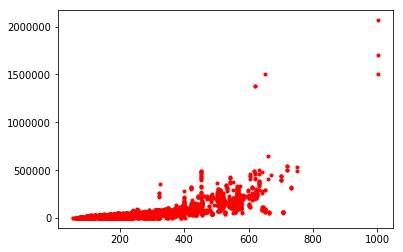

In [14]:
plt.plot(x,y,'r.')
plt.show()

In [15]:
df.corr()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,0.018065,-0.073653,0.100314,-0.243340,-0.269785,0.073008,-0.037437,0.035359,-0.002905,-0.101371,-0.153154,0.123556,0.167141,-0.319510,-0.113317
Model,0.018065,1.000000,0.117518,0.011694,-0.005805,0.037946,-0.104630,-0.108015,0.160707,-0.221727,0.052456,-0.103285,-0.083787,-0.017479,-0.119296,-0.025186
Year,-0.073653,0.117518,1.000000,-0.223699,0.244256,-0.046552,-0.296359,-0.179900,0.182905,-0.194360,0.108599,-0.037100,0.216441,0.180041,0.118304,0.133684
Engine Fuel Type,0.100314,0.011694,-0.223699,1.000000,-0.141533,-0.091385,0.094828,-0.012151,0.019163,-0.036931,-0.046801,-0.182134,-0.054397,-0.013362,-0.060706,-0.069377
Engine HP,-0.243340,-0.005805,0.244256,-0.141533,1.000000,0.811390,-0.143087,0.023640,-0.196042,0.014851,0.182572,0.196905,-0.473019,-0.512779,0.038012,0.656662
Engine Cylinders,-0.269785,0.037946,-0.046552,-0.091385,0.811390,1.000000,-0.128096,0.124095,-0.178578,0.011351,0.170356,0.173228,-0.603237,-0.615459,0.014825,0.589185
Transmission Type,0.073008,-0.104630,-0.296359,0.094828,-0.143087,-0.128096,1.000000,0.194463,-0.309936,0.170818,-0.283638,-0.125292,0.050691,0.029427,-0.012272,-0.140910
Driven_Wheels,-0.037437,-0.108015,-0.179900,-0.012151,0.023640,0.124095,0.194463,1.000000,-0.308930,0.290155,-0.152253,0.103068,0.006329,-0.013054,0.014815,0.001563
Number of Doors,0.035359,0.160707,0.182905,0.019163,-0.196042,-0.178578,-0.309936,-0.308930,1.000000,-0.264123,0.317554,0.171679,0.103413,0.140205,-0.040450,-0.184699
Market Category,-0.002905,-0.221727,-0.194360,-0.036931,0.014851,0.011351,0.170818,0.290155,-0.264123,1.000000,-0.079693,0.384504,0.125265,0.075341,-0.040923,-0.057530


In [16]:
abs(df.corr())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,0.018065,0.073653,0.100314,0.243340,0.269785,0.073008,0.037437,0.035359,0.002905,0.101371,0.153154,0.123556,0.167141,0.319510,0.113317
Model,0.018065,1.000000,0.117518,0.011694,0.005805,0.037946,0.104630,0.108015,0.160707,0.221727,0.052456,0.103285,0.083787,0.017479,0.119296,0.025186
Year,0.073653,0.117518,1.000000,0.223699,0.244256,0.046552,0.296359,0.179900,0.182905,0.194360,0.108599,0.037100,0.216441,0.180041,0.118304,0.133684
Engine Fuel Type,0.100314,0.011694,0.223699,1.000000,0.141533,0.091385,0.094828,0.012151,0.019163,0.036931,0.046801,0.182134,0.054397,0.013362,0.060706,0.069377
Engine HP,0.243340,0.005805,0.244256,0.141533,1.000000,0.811390,0.143087,0.023640,0.196042,0.014851,0.182572,0.196905,0.473019,0.512779,0.038012,0.656662
Engine Cylinders,0.269785,0.037946,0.046552,0.091385,0.811390,1.000000,0.128096,0.124095,0.178578,0.011351,0.170356,0.173228,0.603237,0.615459,0.014825,0.589185
Transmission Type,0.073008,0.104630,0.296359,0.094828,0.143087,0.128096,1.000000,0.194463,0.309936,0.170818,0.283638,0.125292,0.050691,0.029427,0.012272,0.140910
Driven_Wheels,0.037437,0.108015,0.179900,0.012151,0.023640,0.124095,0.194463,1.000000,0.308930,0.290155,0.152253,0.103068,0.006329,0.013054,0.014815,0.001563
Number of Doors,0.035359,0.160707,0.182905,0.019163,0.196042,0.178578,0.309936,0.308930,1.000000,0.264123,0.317554,0.171679,0.103413,0.140205,0.040450,0.184699
Market Category,0.002905,0.221727,0.194360,0.036931,0.014851,0.011351,0.170818,0.290155,0.264123,1.000000,0.079693,0.384504,0.125265,0.075341,0.040923,0.057530


In [17]:
x=data2["Engine HP"]
y=data2["MSRP"]
z=data2["Engine Cylinders"]

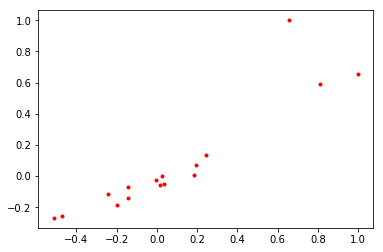

In [18]:
plt.plot(x,y,'r.')
plt.show()

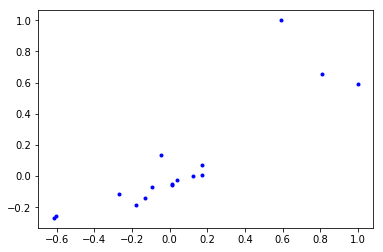

In [19]:
plt.plot(z,y,"b.")
plt.show()

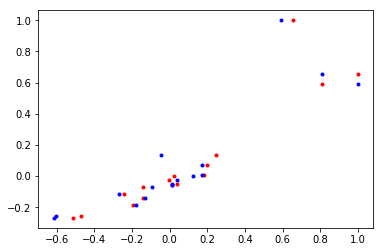

In [20]:
plt.plot(x,y,"r.",z,y,"b.")
plt.show()

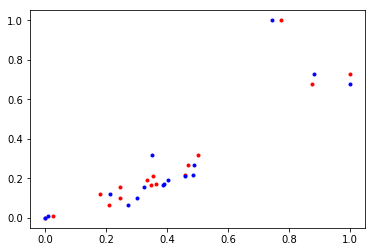

In [21]:
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
z=(z-z.min())/(z.max()-z.min())
plt.plot(x,y,"r.",z,y,"b.")
plt.show()


In [22]:
X=np.array(x)
Y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train.size

12

In [23]:
x_test.size

4

In [24]:
len(x_test)

4

In [25]:
def hypothesis(a,b,c,x):
    return a * x + b * np.power(x, 2) + c

In [26]:
def error(a,b,c,x,y):
    e = 0
    m = len(x)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [27]:
def step_gradient(a,b,c,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,c,x[i]) - y[i]) * x[i]
        grad_b += 1/m * (hypothesis(a,b,c,x[i]) - y[i]) * np.power(x[i], 2)
        grad_c += 1/m * (hypothesis(a,b,c,x[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [28]:
def descend(initial_a, initial_b, initial_c, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    for i in range(iterations):
        e = error(a, b, c, x, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}")
        
        a, b, c = step_gradient(a, b, c, x, y, learning_rate)

    return a, b, c

In [29]:
a = 0
b = 1
c = 1
learning_rate = 0.5
iterations = 10000

final_a, final_b, final_c = descend(a, b, c, x_train, y_train, learning_rate, iterations)

Error: 0.4751560057171881, a: 0, b: 1, c: 1
Error: 0.00795831784838458, a: 0.5519743393296338, b: 0.35482633871252023, c: -0.022069017957403025
Error: 0.007910243469612246, a: 0.6500046083990301, b: 0.2618282942836232, c: -0.038160663742360844
Error: 0.007909276351432591, a: 0.66390871624838, b: 0.24863793122746689, c: -0.04044301980025558
Error: 0.007909256895797443, a: 0.6658808032060257, b: 0.24676707815069987, c: -0.04076673741401738
Error: 0.007909256504406038, a: 0.666160513850582, b: 0.24650172599777173, c: -0.040812651851029606
Error: 0.007909256496532372, a: 0.6662001865660143, b: 0.24646408981674917, c: -0.04081916411800721
Error: 0.007909256496373973, a: 0.6662058135393898, b: 0.2464587516949125, c: -0.04082008778437332
Error: 0.007909256496370788, a: 0.6662066116402766, b: 0.24645799456323847, c: -0.04082021879244762
Error: 0.007909256496370726, a: 0.6662067248387908, b: 0.246457887175586, c: -0.04082023737395726


In [30]:
print(error(a, b, c, x_train, y_train))
print(error(final_a, final_b, final_c, x_train, y_train))
print(error(final_a, final_b, final_c, x_test, y_test))

0.4751560057171881
0.00790925649637072
0.0009203284411698295


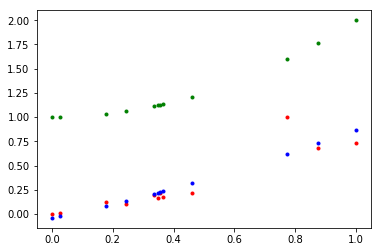

In [31]:
plt.plot(x_train, y_train, 'r.', x_train, hypothesis(a, b, c, x_train), 'g.', x_train, hypothesis(final_a, final_b, final_c, x_train), 'b.', )

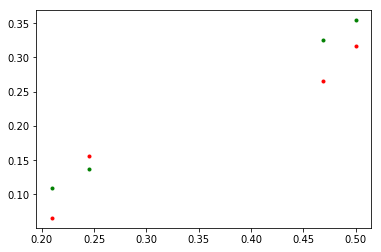

In [32]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, final_c, x_test), 'g.')